In [3]:
import pandas as pd


In [ ]:
df = pd.read_csv(r"C:\Users\Rama Al Jada\Desktop\MLmodel\covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.shape

(581012, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
df.isnull().sum().sum()

0

In [9]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [ ]:
# Target = Cover_Type : 7 Classes 
# No missing value imputation
# One-Hot Encoding was already applied and All features are numerical

In [10]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into Train 80% and Test sets 20%
# stratify=y train_test_split  keep class distribution in train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Make a copy of X_train and X_test to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()


num_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]


# Initialize StandardScaler
scaler = StandardScaler()

# Do not fit on Test = only transform
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])

# Do not fit on Test  always use Train’s scaler.
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (464809, 54)
X_test shape: (116203, 54)
y_train shape: (464809,)
y_test shape: (116203,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9388656058793663
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.85       549
           5       0.84      0.84      0.84      1899
           6       0.88      0.87      0.88      3473
           7       0.95      0.94      0.94      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [ ]:
# We establish the baseline performance for all four models before performing any hyperparameter tuning

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM (sampled)': SVC(random_state=42),          
    'k-NN (sampled)': KNeighborsClassifier()
}

# sampling for SVM/k-NN large dataset
sample_size = 50000
X_train_sample = X_train.sample(sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Train and Evaluate Models
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    if 'sampled' in name:
        model.fit(X_train_sample, y_train_sample)
    else:
        model.fit(X_train, y_train)
        
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append([name, acc, prec, rec, f1])

import pandas as pd
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print("\nBaseline Model Performance:\n")
print(results_df)


Training Logistic Regression...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Decision Tree...
Training SVM (sampled)...
Training k-NN (sampled)...

Baseline Model Performance:

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.723518   0.710844  0.723518  0.713903
1        Decision Tree  0.938866   0.938856  0.938866  0.938859
2        SVM (sampled)  0.792320   0.793901  0.792320  0.783941
3       k-NN (sampled)  0.841269   0.839595  0.841269  0.839534


In [ ]:
# Decision Tree: Excellent performance Accuracy 0.94
# SVM (sampled): Lower performance (0.79)  Normal as it's based on a small sample to save time
# k-NN (sampled): Average performance (0.84)
#Logistic Regression: Relatively poor performance (0.72)  Possible improvement after Hyperparameter Tuning or solver modification


# Baseline Performance  Performance of each model before hyperparameter tuning
# This helps us identify which models are already performing well and which ones need improvement

In [ ]:
# Hyperparameters
# improve model performance by adjusting the hyperparameters for each model use GridSearchCV or RandomizedSearchCV
# To get the best possible performance for each model
# Then compare the models and decide which one is the best

In [14]:
# Hyperparameter Tuning for 4 Models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Define models and their hyperparameter grids
models_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 10, 50],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=3000, solver='saga', random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Sample data for SVM and k-NN
sample_size = 50000
X_train_sample = X_train.sample(sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Run GridSearchCV for each model
results_tuned = []

for name, mp in models_params.items():
    print(f"\nTuning {name}...")
    
    model = mp['model']
    params = mp['params']
    
    # Use sample for SVM and k-NN to save time
    if name in ['SVM', 'k-NN']:
        grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_sample, y_train_sample)
    else:
        grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    
    # Evaluate on Test Data
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    results_tuned.append([name, acc, f1_weighted])

# Display tuned results
results_tuned_df = pd.DataFrame(results_tuned, columns=['Model', 'Accuracy', 'F1-weighted'])
print("\nPerformance After Hyperparameter Tuning:\n")
print(results_tuned_df)


Tuning Decision Tree...
Best params for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 10, 'penalty': 'l2'}

Tuning k-NN...
Best params for k-NN: {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}

Tuning SVM...
Best params for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Performance After Hyperparameter Tuning:

                 Model  Accuracy  F1-weighted
0        Decision Tree  0.938866     0.938859
1  Logistic Regression  0.723579     0.713975
2                 k-NN  0.856914     0.856404
3                  SVM  0.828610     0.825311


In [ ]:
#Decision Tree  Best performance after tuning  Accuracy 93.88% 
#Logistic Regression  Relatively poor performance only 72%  Normal with a large and complex dataset
#k-NN  Very good performance on a sample 85.69%
#SVM  Average performance 82.86%


Evaluating Decision Tree...


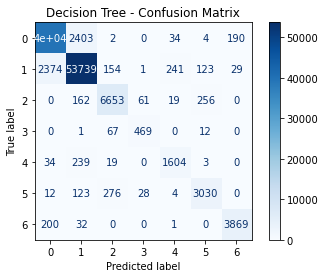


Evaluating Logistic Regression...


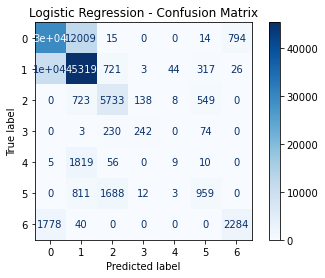


Evaluating k-NN...


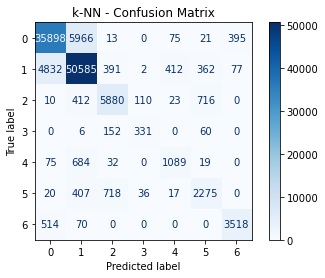


Evaluating SVM...


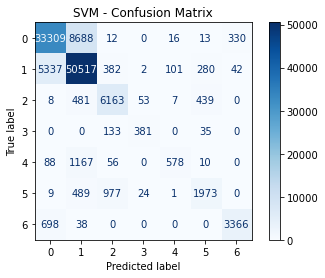


Final Performance Comparison After Hyperparameter Tuning:

                 Model  Accuracy  F1-weighted
0        Decision Tree  0.938866     0.938859
1  Logistic Regression  0.723579     0.713975
2                 k-NN  0.856914     0.856404
3                  SVM  0.828610     0.825311


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Best Models after Hyperparameter Tuning
best_models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42),
    'Logistic Regression': LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=3000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski'),
    'SVM': SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
}

# Sample data for big models
X_train_sample = X_train.sample(50000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Store results
results_final = []

for name, model in best_models.items():
    print(f"\nEvaluating {name}...")
    
    # Train model
    if name in ['SVM', 'k-NN']:
        model.fit(X_train_sample, y_train_sample)
    else:
        model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1_w = f1_score(y_test, y_pred, average='weighted')
    
    results_final.append([name, acc, f1_w])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Comparison Table
results_final_df = pd.DataFrame(results_final, columns=['Model', 'Accuracy', 'F1-weighted'])
print("\nFinal Performance Comparison After Hyperparameter Tuning:\n")
print(results_final_df)


In [ ]:
#After hyperparameter tuning the Decision Tree model achieved the best performance with an accuracy of 93.9% and an F1-weighted score of 93.9
#k-NN and SVM showed good results while Logistic Regression had the lowest performance with an accuracy of 72.4%
#Overall hyperparameter tuning improved all models and Decision Tree was selected as the best model